In [1]:
import numpy as np
import seaborn as sns
from Maze_big import Maze

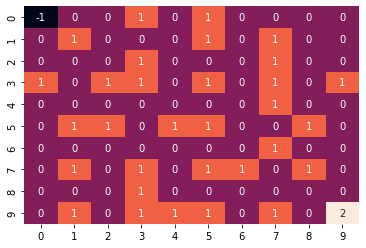

In [2]:
env = Maze()
env.reset()
env.plot()

In [12]:
action_value = np.zeros((10, 10, 4))

In [13]:
def policy(state, epsilon = 0.2):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(4)
    else:
        av = action_value[tuple(state)]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [22]:
def SARSA(policy, Q, episodes, gamma=0.99, epsilon=0.2, alpha = 0.2):
    
    for episode in range(1, episodes+1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        
        while not done:
            state = tuple(state)
            next_state, reward, done = env.step(action)
            next_state = tuple(next_state)
            next_action = policy(next_state, epsilon)
            
            qsa = Q[state][action]
            next_qsa = Q[next_state][next_action]
            Q[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [23]:
env.reset()
SARSA(policy=policy, Q=action_value, episodes=1000)

<AxesSubplot:>

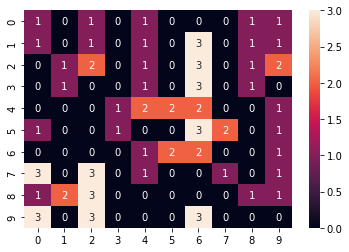

In [24]:
sns.heatmap(np.argmax(action_value, axis = 2), annot=True)

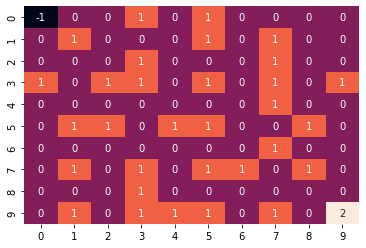

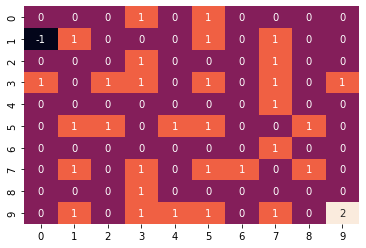

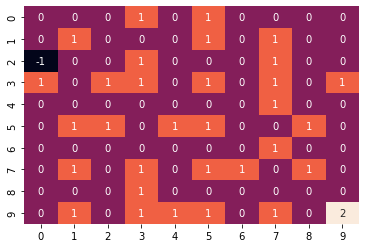

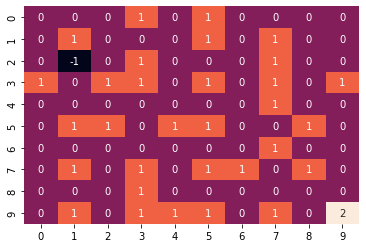

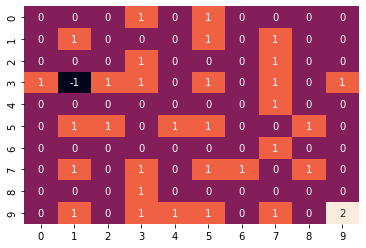

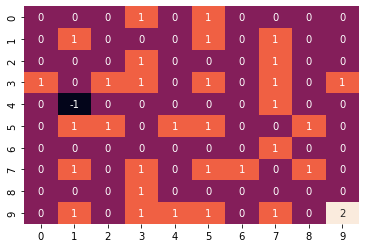

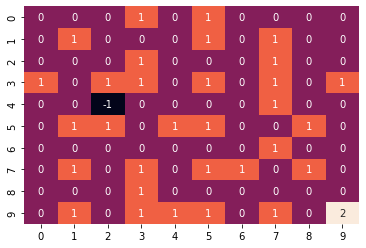

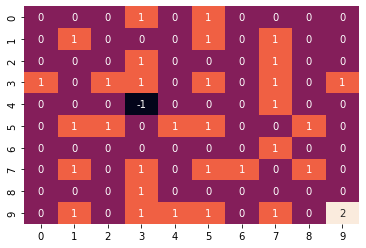

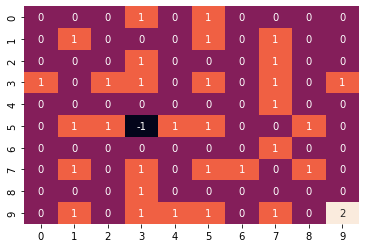

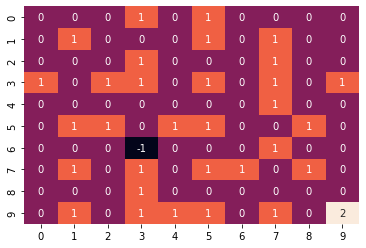

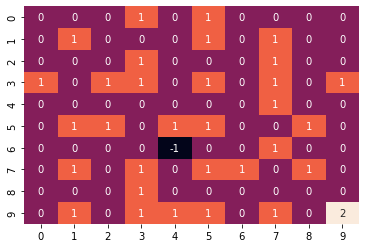

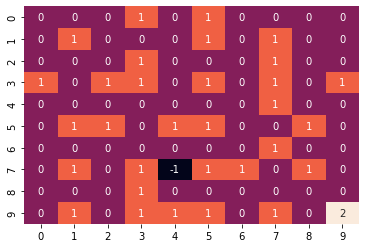

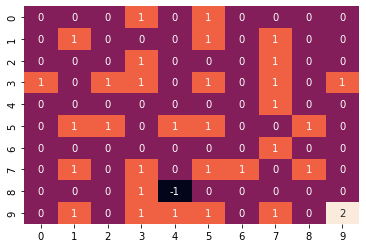

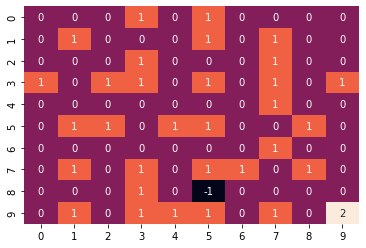

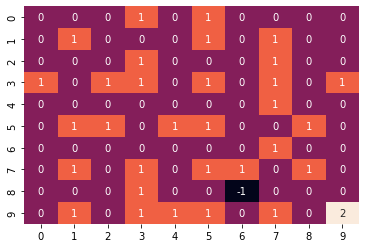

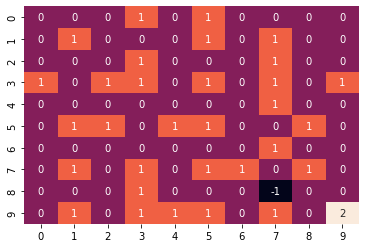

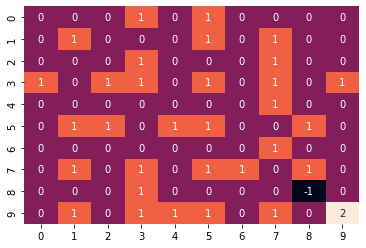

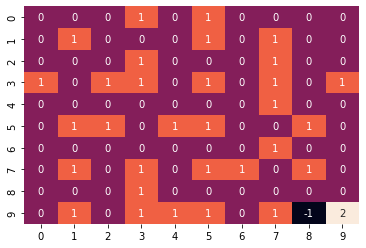

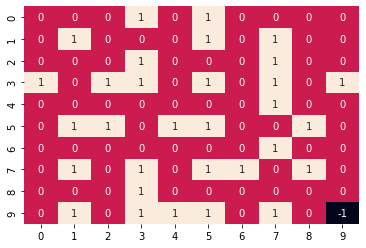

In [25]:
env.reset()
done = False

while done == False:
    env.plot()
    action = np.argmax(action_value[env.current_pos[0], env.current_pos[1]])
    _, _, done = env.step(action)
    
env.plot()